In [43]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import pandas as pd
import glob
import re
from functools import reduce
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
from PIL import Image 
import numpy as np

In [5]:
#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
df=pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [9]:
#타이틀에서 단어의 출제 빈도수 찾아보기
all_title=df["title"]
all_title

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

In [11]:
stopWords=set(stopwords.words("english"))
lemma=WordNetLemmatizer()

In [13]:
words=[]
for title in all_title: 
    
    #알파벳으로 시작하지 않는 단어 공백으로 치환해서 제거 정규식사용
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    
    # 소문자로 변환후 토큰화(단어를 하나하나 쪼갬)
    EnWordsToken = word_tokenize(EnWords.lower()) 
    
    #의미가 없는 단어(불용어 ex:the,is)들을 제거 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    
    #남은단어들의 표제어(기본형으로 바꿈 ex:playong=play) 추출
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    
    words.append(EnWordsTokenStopLemma) #처리다된것들을 리스트에 추가

In [15]:
words2=list(reduce(lambda x,y:x+y,words))

In [17]:
count=Counter(words2)

In [19]:
word_count=dict()

for tag,counts in count.most_common(50):
    if(len(str(tag))>1): #and tag != 'data':
        word_count[tag]=counts
        print("%s : %d" % (tag,counts))

love : 152
story : 95
man : 79
christmas : 79
life : 75
girl : 74
world : 73
movie : 63
day : 61
one : 58
little : 58
time : 58
boy : 55
monster : 53
last : 49
de : 49
la : 48
secret : 46
power : 46
high : 45
live : 45
el : 45
american : 45
black : 43
house : 42
game : 42
war : 41
king : 40
city : 39
night : 39
super : 38
tale : 37
kid : 35
new : 35
legend : 35
first : 34
adventure : 34
family : 33
go : 33
good : 33
show : 33
ranger : 33
dream : 31
special : 30
great : 30
friend : 30
mr : 29
baby : 28


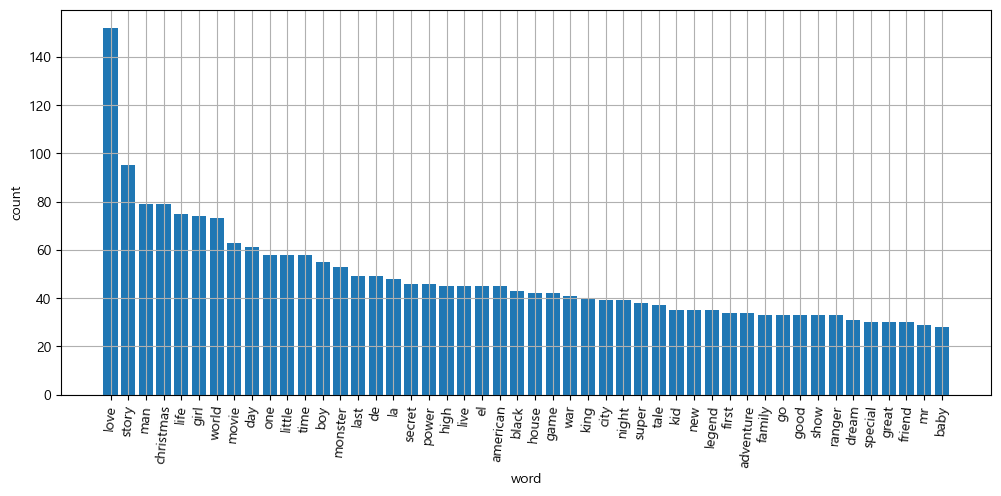

In [57]:
#히스토그램으로 단어 빈도수 알아보기
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys=sorted(word_count,key=word_count.get,reverse=True)
sorted_Values=sorted(word_count.values(),reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align = "center")
plt.xticks(range(len(word_count)), list(sorted_Keys) , rotation=85)
plt.show()

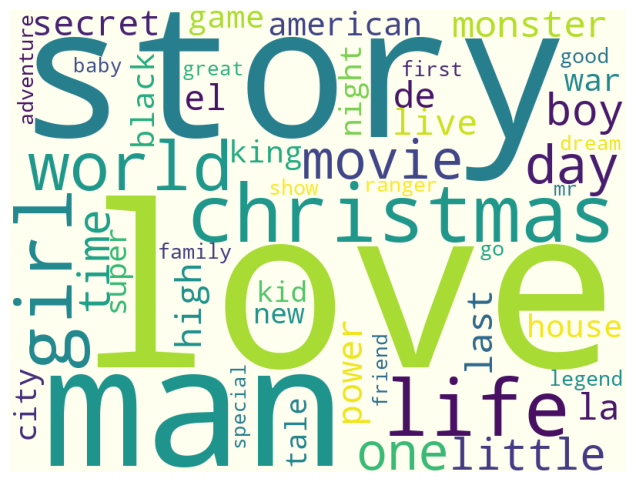

In [35]:
#단어의 빈도수를 워드 클라우드로 시각화
stopwords = set(STOPWORDS)

wc = WordCloud(
                background_color = 'ivory', 
                stopwords = stopwords,
                width = 800,
                height = 600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize = (8,6))
plt.imshow(cloud)
plt.axis('off')
plt.show()

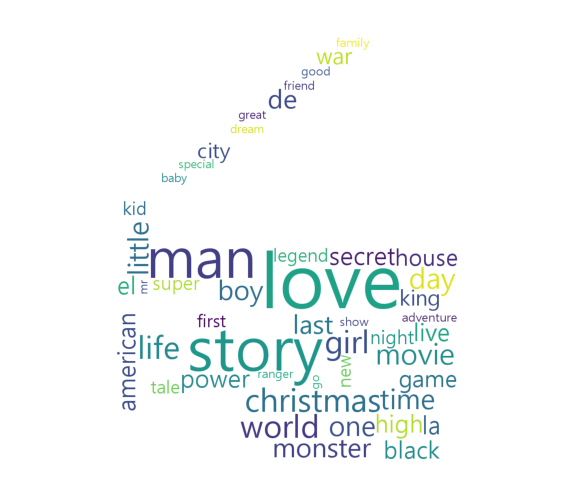

In [55]:
#워드 클라우드 마스크
masking_image = np.array(Image.open("C:\\Users\\user\\0Data\\0923_text\\movie.png"))

wc = WordCloud(font_path="C:/Windows/fonts/malgun.ttf",
                       width=800, height=600, 
                       mask=masking_image, # masking
                       background_color='white').generate_from_frequencies(word_count)
plt.figure(figsize=(8,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [49]:
masking_image

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255